# Machine Learning with a Heart (By P_A Team)
https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/109/

Your goal is to predict the binary class heart_disease_present, which represents whether or not a patient has heart disease:

* 0 represents no heart disease present
* 1 represents heart disease present

There are **13 features** + **patient_id** (unique and random identifier)

The list of features is:
* **slope_of_peak_exercise_st_segment** (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
* **thal** (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
* **resting_blood_pressure** (type: int): resting blood pressure
* **chest_pain_type** (type: int): chest pain type (4 values)
* **num_major_vessels** (type: int): number of major vessels (0-3) colored by flourosopy
* **fasting_blood_sugar_gt_120_mg_per_dl** (type: binary): fasting blood sugar > 120 mg/dl
* **resting_ekg_results** (type: int): resting electrocardiographic results (values 0,1,2)
* **serum_cholesterol_mg_per_dl** (type: int): serum cholestoral in mg/dl
* **oldpeak_eq_st_depression** (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
* **sex** (type: binary): 0: female, 1: male
* **age** (type: int): age in years
* **max_heart_rate_achieved** (type: int): maximum heart rate achieved (beats per minute)
* **exercise_induced_angina** (type: binary): exercise-induced chest pain (0: False, 1: True)

## Performance Metric
Performance is evaluated according to binary **log loss**.
https://en.wikipedia.org/wiki/Loss_functions_for_classification#Cross_entropy_loss_(Log_Loss)

## 1. Important questions:
    1. Understand what are the meaning of the features...
    2. Feature Engineering --> I guess it could be very important to play with some features and see how they can interact --> Pere? We can ask him about it......
    
## Let's take a look to the dataset


In [1]:
# Import essentials
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import seaborn as sns

The train values, train labels and test values are in different datasets, **we will load evrything and merge it together in the same dataframe (with label = NaN for the test)**. In that way, all the treatment (means, outliers, ...) we do would be considering the entire dataset

In [2]:
# load the csv
train_values_df = pd.read_csv('train_values.csv') # Load the `train` file
train_labels_df = pd.read_csv('train_labels.csv') # Load the `train` file
test_values_df = pd.read_csv('test_values.csv') # Load the `train` file

#store the original dimensions
len_train=train_values_df.shape[0]
len_test=test_values_df.shape[0]

# merge and concat the dataframes in one (NaNs for the test label)
heart_df= pd.concat([pd.merge(train_values_df, train_labels_df, on='patient_id'), test_values_df], sort=False)
heart_df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0.0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0.0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1.0
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1.0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0.0


Let's check number of pacients, if NaNs, duplicates, whatever,....

In [3]:
print('length of train: ', len_train)
print('length of test: ',len_test)
heart_df.describe()

length of train:  180
length of test:  90


,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000,180.000000
mean,1.585185,131.344444,3.174074,0.670370,0.148148,1.022222,249.659259,1.05000,0.677778,54.433333,149.677778,0.329630,0.444444
std,0.614390,17.861608,0.950090,0.943896,0.355906,0.997891,51.686237,1.14521,0.468195,9.109067,23.165717,0.470952,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.00000,0.000000,29.000000,71.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.000000,0.00000,0.000000,48.000000,133.000000,0.000000,0.000000
50%,2.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.000000,0.80000,1.000000,55.000000,153.500000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,280.000000,1.60000,1.000000,61.000000,166.000000,1.000000,1.000000
max,3.000000,200.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.20000,1.000000,77.000000,202.000000,1.000000,1.000000


In [4]:
print ('Where are the null values: ',heart_df.isnull().any(), '\n ________________________________\n')
heart_df.isnull().sum()

Where are the null values:  patient_id                              False
slope_of_peak_exercise_st_segment       False
thal                                    False
resting_blood_pressure                  False
chest_pain_type                         False
num_major_vessels                       False
fasting_blood_sugar_gt_120_mg_per_dl    False
resting_ekg_results                     False
serum_cholesterol_mg_per_dl             False
oldpeak_eq_st_depression                False
sex                                     False
age                                     False
max_heart_rate_achieved                 False
exercise_induced_angina                 False
heart_disease_present                    True
dtype: bool 
 ________________________________



patient_id                               0
slope_of_peak_exercise_st_segment        0
thal                                     0
resting_blood_pressure                   0
chest_pain_type                          0
num_major_vessels                        0
fasting_blood_sugar_gt_120_mg_per_dl     0
resting_ekg_results                      0
serum_cholesterol_mg_per_dl              0
oldpeak_eq_st_depression                 0
sex                                      0
age                                      0
max_heart_rate_achieved                  0
exercise_induced_angina                  0
heart_disease_present                   90
dtype: int64

There aren't any NaNs (heart_disease_present with NaNs are the test data).  
Now check if there are any duplicate

In [5]:
ids = heart_df["patient_id"]
heart_df[ids.isin(ids[ids.duplicated()])]

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


There aren't any duplicates neither.
Let's see which are the values for each of the features:

In [6]:
print ('slope_of_peak_exercise_st_segment : ', heart_df.slope_of_peak_exercise_st_segment.unique(), '\n ________________________________\n')
print ('thal : ', heart_df.thal.unique(), '\n ________________________________\n')
print ('resting_blood_pressure : ', sorted(heart_df.resting_blood_pressure.unique()), '\n ________________________________\n')
print ('chest_pain_type : ', heart_df.chest_pain_type.unique(), '\n ________________________________\n')
print ('num_major_vessels : ', heart_df.num_major_vessels.unique(), '\n ________________________________\n')
print ('fasting_blood_sugar_gt_120_mg_per_dl : ', heart_df.fasting_blood_sugar_gt_120_mg_per_dl.unique(), '\n ________________________________\n')
print ('resting_ekg_results : ', heart_df.resting_ekg_results.unique(), '\n ________________________________\n')
print ('serum_cholesterol_mg_per_dl : ', sorted(heart_df.serum_cholesterol_mg_per_dl.unique()), '\n ________________________________\n')
print ('oldpeak_eq_st_depression : ', sorted(heart_df.oldpeak_eq_st_depression.unique()), '\n ________________________________\n')
print ('sex : ', heart_df.sex.unique(), '\n ________________________________\n')
print ('age : ', sorted(heart_df.age.unique()), '\n ________________________________\n')
print ('max_heart_rate_achieved : ', sorted(heart_df.max_heart_rate_achieved.unique()), '\n ________________________________\n')
print ('exercise_induced_angina : ', sorted(heart_df.exercise_induced_angina.unique()), '\n ________________________________\n')

slope_of_peak_exercise_st_segment :  [1 2 3] 
 ________________________________

thal :  ['normal' 'reversible_defect' 'fixed_defect'] 
 ________________________________

resting_blood_pressure :  [94, 100, 101, 102, 104, 105, 106, 108, 110, 112, 115, 117, 118, 120, 122, 123, 124, 125, 126, 128, 129, 130, 132, 134, 135, 136, 138, 140, 142, 144, 145, 146, 148, 150, 152, 155, 156, 158, 160, 165, 170, 172, 174, 178, 180, 192, 200] 
 ________________________________

chest_pain_type :  [2 3 4 1] 
 ________________________________

num_major_vessels :  [0 3 2 1] 
 ________________________________

fasting_blood_sugar_gt_120_mg_per_dl :  [0 1] 
 ________________________________

resting_ekg_results :  [2 0 1] 
 ________________________________

serum_cholesterol_mg_per_dl :  [126, 141, 149, 160, 164, 166, 167, 168, 172, 174, 175, 177, 178, 180, 182, 183, 184, 185, 186, 188, 192, 193, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,

A lot of information:
    1. no NaNs
    2. no younger people than 29, oldets one is 77
    3. cholesterol moves between 126 and 564
    4. blood pressure at rest between 94 and 200
Can we eliminate some outliers? Or we must consider all of them?

Let's apply dummies and pass thal information to sparse table

In [7]:
heart_df_D=pd.get_dummies(heart_df, columns=['thal'])
print(heart_df_D.head())

  patient_id  slope_of_peak_exercise_st_segment  resting_blood_pressure  \
0     0z64un                                  1                     128   
1     ryoo3j                                  2                     110   
2     yt1s1x                                  1                     125   
3     l2xjde                                  1                     152   
4     oyt4ek                                  3                     178   

   chest_pain_type  num_major_vessels  fasting_blood_sugar_gt_120_mg_per_dl  \
0                2                  0                                     0   
1                3                  0                                     0   
2                4                  3                                     0   
3                4                  0                                     0   
4                1                  0                                     0   

   resting_ekg_results  serum_cholesterol_mg_per_dl  oldpeak_eq_st_depress

## Compare the histograms of train and test (is the dataset balanced?)
*Copiat Arnau Titanic.. ;P*

In [8]:
features_all = heart_df.columns.tolist()
print(features_all)

features_int=['slope_of_peak_exercise_st_segment','resting_blood_pressure', 'chest_pain_type', 
              'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
              'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved',
              'exercise_induced_angina']

['patient_id', 'slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina', 'heart_disease_present']


In [9]:
#histograms of train vs test dels int

def compare_dist(ax, feature, i=0):
    sns.kdeplot(train_values_df[feature], label="train", ax=ax)
    sns.kdeplot(test_values_df[feature], label="test", ax=ax)


def numeric_tile(plot_func):
    fig, axs = plt.subplots(3, 4, figsize=(24, 12))
    axs = axs.flatten()
    
    for i, (ax, col) in enumerate(zip(axs, features_int)):
        plot_func(ax, col, i)
        ax.set_title(col)
        sns.set(font_scale=1.3) 
        sns.set_style("ticks")
        ax.legend(frameon=False)
    plt.tight_layout()

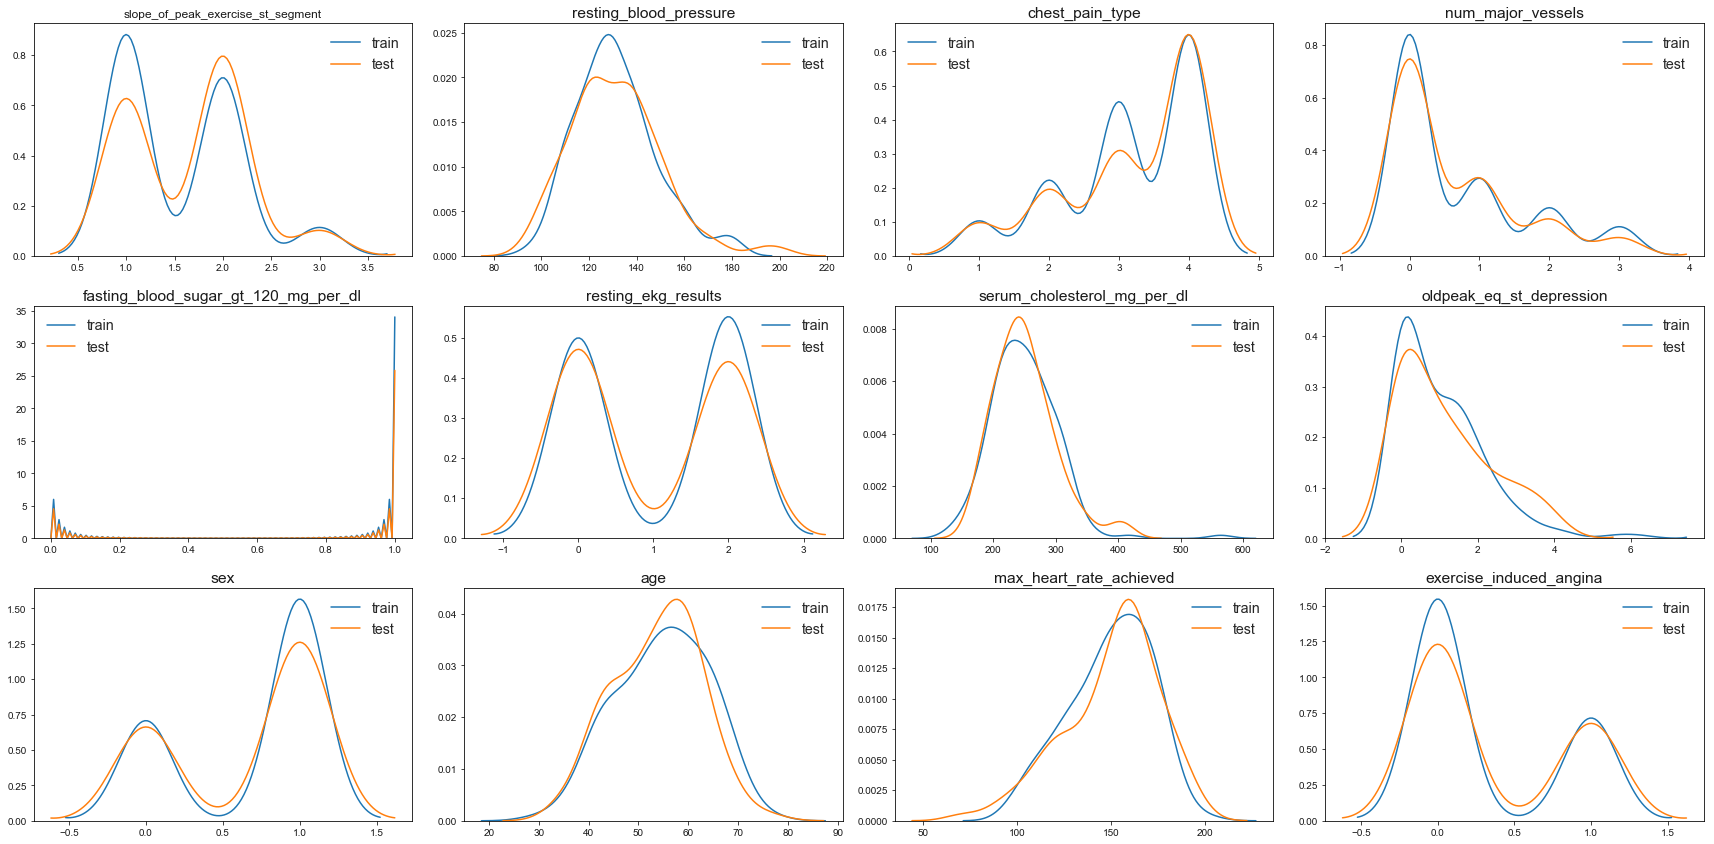

In [10]:
numeric_tile(compare_dist)

I love this images! we can see if both train and test are more or less similar. 
In general terms I would say that they are similar, so the train seems representative of the test (however, we will see if we can modify the train data somehow..)

## Let's take a look for the correlations....(in the training set)

In [11]:
cor=heart_df_D.corr()
print ('Training correlations (Pearson): \n', cor["heart_disease_present"].sort_values(ascending=False))

Training correlations (Pearson): 
 heart_disease_present                   1.000000
thal_reversible_defect                  0.525145
exercise_induced_angina                 0.448647
num_major_vessels                       0.421519
chest_pain_type                         0.412829
oldpeak_eq_st_depression                0.382930
slope_of_peak_exercise_st_segment       0.344224
sex                                     0.335421
resting_ekg_results                     0.145933
age                                     0.138255
serum_cholesterol_mg_per_dl             0.079775
resting_blood_pressure                  0.078506
thal_fixed_defect                       0.024112
fasting_blood_sugar_gt_120_mg_per_dl    0.003379
max_heart_rate_achieved                -0.375352
thal_normal                            -0.528812
Name: heart_disease_present, dtype: float64


All the correlation are positive (except max_heart_rate_achieved and thal_normal). All the rest shows higher correlation for thal_reversible_defect, exercice_induced_angina, num_major_vessels and chest_pain_type.
I am very surprised for the low correlation obsreved in: serum_cholesterol_mg_per_dl and serum_cholesterol_mg_per_dl
Could we improve this creating groups? (mean, high, suprhigh...?)

# Let's bin some of the features: resting blood pressure, age, serum_cholesterol_mg_per_dl, 
La idea de fer aixo es reduir la complexitat del model, eliminar informacio que no es util: veiem que l'edat te poc impacte, aixo potser es perque hi han masses valors, passa el mateix amb algunes variables que a priori semblarien molt necessaries...

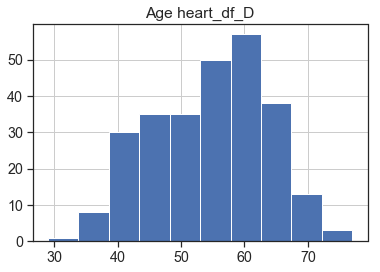

In [12]:
heart_df_D.age.hist()
plt.title('Age heart_df_D')
plt.show()

In [13]:
# en aquest bloc definim una columna categoritzant les edats
bins= [20,30,40,50,60,70,80]
labels = ['a20','a30','a40','a50','a60','a70']
heart_df_D['AgeGroup'] = pd.cut(heart_df_D['age'], bins=bins, labels=labels, right=False)
del heart_df_D['age']

In [14]:
heart_df_D.head()

,patient_id,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_fixed_defect,thal_normal,thal_reversible_defect,AgeGroup
0,0z64un,1,128,2,0,0,2,308,0.0,1,170,0,0.0,0,1,0,a40
1,ryoo3j,2,110,3,0,0,0,214,1.6,0,158,0,0.0,0,1,0,a50
2,yt1s1x,1,125,4,3,0,2,304,0.0,1,162,1,1.0,0,1,0,a70
3,l2xjde,1,152,4,0,0,0,223,0.0,1,181,0,1.0,0,0,1,a40
4,oyt4ek,3,178,1,0,0,2,270,4.2,1,145,0,0.0,0,0,1,a50


In [15]:
heart_df_D=pd.get_dummies(heart_df_D, columns=['AgeGroup'])

In [16]:
heart_df_D.head(10)

,patient_id,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,...,heart_disease_present,thal_fixed_defect,thal_normal,thal_reversible_defect,AgeGroup_a20,AgeGroup_a30,AgeGroup_a40,AgeGroup_a50,AgeGroup_a60,AgeGroup_a70
0,0z64un,1,128,2,0,0,2,308,0.0,1,...,0.0,0,1,0,0,0,1,0,0,0
1,ryoo3j,2,110,3,0,0,0,214,1.6,0,...,0.0,0,1,0,0,0,0,1,0,0
2,yt1s1x,1,125,4,3,0,2,304,0.0,1,...,1.0,0,1,0,0,0,0,0,0,1
3,l2xjde,1,152,4,0,0,0,223,0.0,1,...,1.0,0,0,1,0,0,1,0,0,0
4,oyt4ek,3,178,1,0,0,2,270,4.2,1,...,0.0,0,0,1,0,0,0,1,0,0
5,ldukkw,1,130,3,0,0,0,180,0.0,1,...,0.0,0,1,0,0,0,1,0,0,0
6,2gbyh9,2,150,4,2,0,2,258,2.6,0,...,1.0,0,0,1,0,0,0,0,1,0
7,daa9kp,2,150,4,1,0,2,276,0.6,1,...,1.0,1,0,0,0,0,0,1,0,0
8,3nwy2n,3,170,4,0,0,2,326,3.4,1,...,1.0,0,0,1,0,0,0,1,0,0
9,1r508r,2,120,3,0,0,0,219,1.6,0,...,0.0,0,1,0,0,0,0,1,0,0


Algo semlant per la resting blood pressure (va de 94 a 200), serum_cholesterol_mg_per_dl (126 a 564) i max_heart_rate_achieved (de 71 a 202)

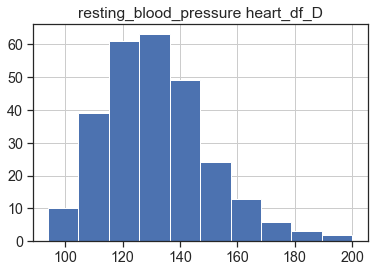

In [17]:
heart_df_D.resting_blood_pressure.hist()
plt.title('resting_blood_pressure heart_df_D')
plt.show()

In [18]:
# en aquest bloc definim una columna categoritzant les resting blood pressure
bins= [80,100,120,140,160,180,200]
labels = ['90','110','130','150','170','190']
heart_df_D['blood_press'] = pd.cut(heart_df_D['resting_blood_pressure'], bins=bins, labels=labels, right=False)
del heart_df_D['resting_blood_pressure']
heart_df_D=pd.get_dummies(heart_df_D, columns=['blood_press'])

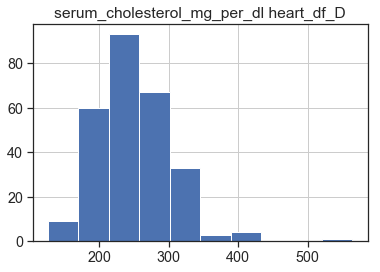

In [19]:
heart_df_D.serum_cholesterol_mg_per_dl.hist()
plt.title('serum_cholesterol_mg_per_dl heart_df_D')
plt.show()

In [20]:
# en aquest bloc definim una columna categoritzant el serum colesterol
bins= [120,180,240,300,360,420,580]
labels = ['140','210','270','330','390','500']
heart_df_D['Colesterol'] = pd.cut(heart_df_D['serum_cholesterol_mg_per_dl'], bins=bins, labels=labels, right=False)
del heart_df_D['serum_cholesterol_mg_per_dl']
heart_df_D=pd.get_dummies(heart_df_D, columns=['Colesterol'])

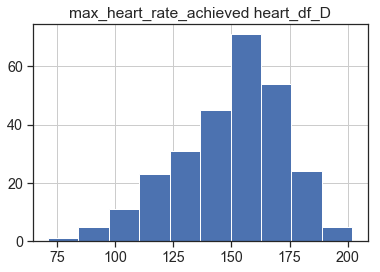

In [21]:
heart_df_D.max_heart_rate_achieved.hist()
plt.title('max_heart_rate_achieved heart_df_D')
plt.show()

In [22]:
# en aquest bloc definim una columna categoritzant el max_heart_rate_achieved
bins= [60,100,120,130,140,150,160,170,180,200]
labels = ['80','110','125','135','145','155','165','175','190']
heart_df_D['Max_heart'] = pd.cut(heart_df_D['max_heart_rate_achieved'], bins=bins, labels=labels, right=False)
del heart_df_D['max_heart_rate_achieved']
heart_df_D=pd.get_dummies(heart_df_D, columns=['Max_heart'])

In [23]:
cor=heart_df_D.corr()
print ('Training correlations (Pearson): \n', cor["heart_disease_present"].sort_values(ascending=False))

Training correlations (Pearson): 
 heart_disease_present                   1.000000
thal_reversible_defect                  0.525145
exercise_induced_angina                 0.448647
num_major_vessels                       0.421519
chest_pain_type                         0.412829
oldpeak_eq_st_depression                0.382930
slope_of_peak_exercise_st_segment       0.344224
sex                                     0.335421
Max_heart_110                           0.231355
resting_ekg_results                     0.145933
Max_heart_80                            0.145556
AgeGroup_a60                            0.145263
Colesterol_270                          0.108270
Max_heart_135                           0.092987
Max_heart_145                           0.077743
Colesterol_330                          0.062622
blood_press_190                         0.058222
Max_heart_125                           0.053936
AgeGroup_a30                            0.051405
thal_fixed_defect                 

# Feature Engineering:
I si busquessim noves variables que tinguessin relacio amb heart_disease_present?

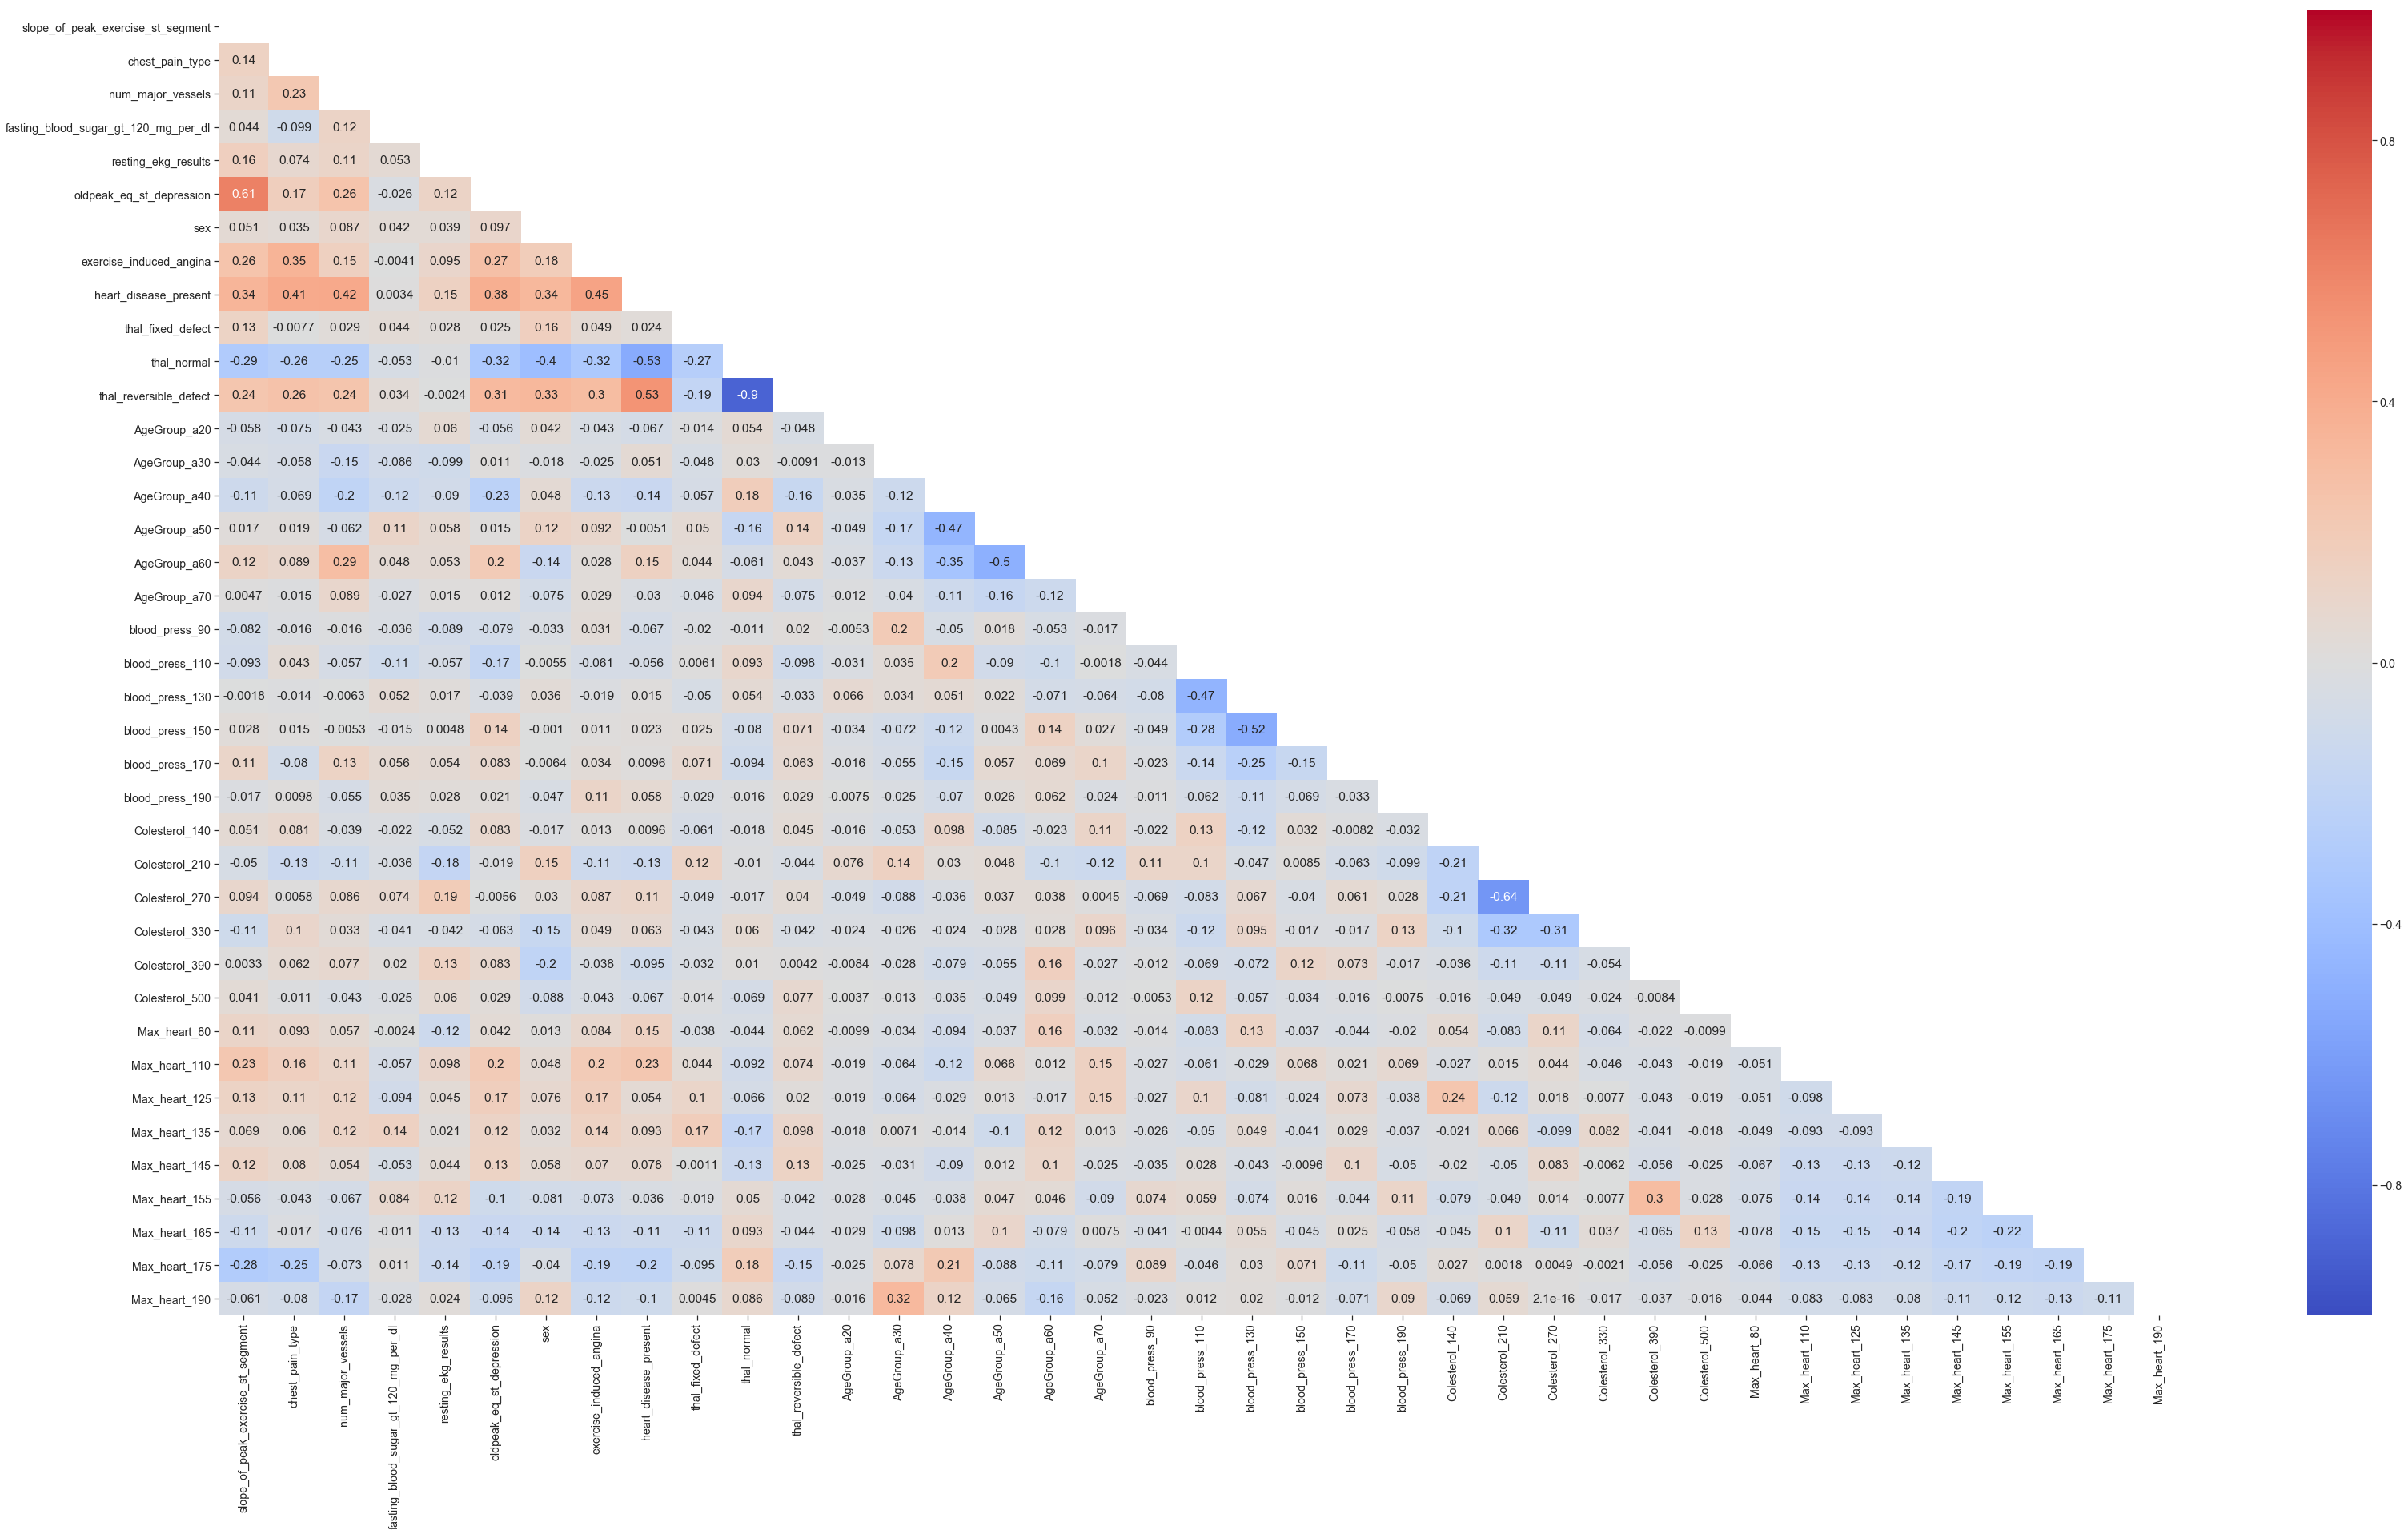

In [24]:
mask = np.zeros_like(heart_df_D.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(55,30))
sns.heatmap(heart_df_D.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            mask = mask);

Aquesta figura es molt interessant, i ens mostra quines variables estan relacionades entre elles, 
1. Podriem crear noves variables a partir d'aquestes? sumant, multiplicant, dividint....

Resum relacions notables (>0.6):
1. oldpeak_eq_st_depression amb slope_of_peak_exercice amb 0.61
2. thai_reversible_effect amb thai_normal amb 0.9
3. Colesterol 270 amb colesterol 210?

n'hi han moltes mes amb correlacions mes altes de 0.3.....donar cop d'ull?

# Model application
## 1. hem de tornar a separar la part de training i de test, i despres ja podem fer proves amb models sobre el training

In [25]:
df_Heart_train=heart_df_D[:len_train]
df__Heart_test=heart_df_D[len_train:]

## 2. Primera part on directament apliquem diferents models sobre el set d'entrenament i veiem amb quin seguirem treballant.
Es una primera aproximacio per escollir model.
El problema es que fent servir aquesta metodologia, no podem obtenit el log_loss (que es el metode de score que es fa servir). ...bé, primer mirem i desprès apliquem un altre mètode.

In [26]:
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import array

y_train=array(df_Heart_train['heart_disease_present'])

del df_Heart_train['heart_disease_present']
del df_Heart_train['patient_id']

X_train=array(df_Heart_train)

In [27]:
import sklearn.preprocessing as preproc

# Create pairwise interaction features, skipping the constant bias term
X2_train = preproc.PolynomialFeatures(include_bias=False).fit_transform(X_train)
X2b_train = preproc.PolynomialFeatures(include_bias=True).fit_transform(X_train)
X3_train = preproc.PolynomialFeatures(interaction_only=True).fit_transform(X_train)
print (X_train.shape)
print (X2_train.shape)
print (X3_train.shape)


(180, 38)
(180, 779)
(180, 742)


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC, NuSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss


clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(NuSVC(probability=True))
clfs.append(GaussianNB())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())


for classifier in clfs:
    pipeline = Pipeline([ ('clf', LogisticRegression())])
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train, scoring='f1')
   
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You sho

---------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
-----------------------------------
fit_time  mean  0.030013004938761394
fit_time  std  0.03466998596898407
score_time  mean  0.030664920806884766
score_time  std  0.0405413907575339
test_score  mean  0.7552696556205328
test_score  std  0.06176141929787144
train_score  mean  0.8724340943513432
train_score  std  0.02845181634550064
---------------------------------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
-----------------------------------
fit_time  mean  0.022331396738688152
fit_time  std  0.028051556

C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in

  std  0.05482081297667182
---------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
-----------------------------------
fit_time  mean  0.010665178298950195
fit_time  std  0.012255797803724697
score_time  mean  0.005666414896647136
score_time  std  0.0009443161963489972
test_score  mean  0.7762560799978262
test_score  std  0.042545712135844384
train_score  mean  0.8570306790440205
train_score  std  0.037422275775157464
---------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
-----------------------------------
fit_time  mea

C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


---------------------------------
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
-----------------------------------
fit_time  mean  0.11899145444234212
fit_time  std  0.036508869108941355
score_time  mean  0.00233308474222819
score_time  std  0.00047142655959197545
test_score  mean  0.7345351540753838
test_score  std  0.06242041059435651
train_score  mean  1.0
train_score  std  0.0


In [29]:
for classifier in clfs:
    pipeline = Pipeline([ ('clf', LogisticRegression())])
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X2b_train, y_train, scoring='f1')
   
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

---------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
-----------------------------------
fit_time  mean  0.008664369583129883
fit_time  std  0.0009420679870692985
score_time  mean  0.0023355484008789062
score_time  std  0.00047035886966530183
test_score  mean  0.7189054888303009
test_score  std  0.037513447132565075
train_score  mean  1.0
train_score  std  0.0
---------------------------------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You sho


-----------------------------------
fit_time  mean  0.016658703486124676
fit_time  std  0.004635007786713045
score_time  mean  0.007666110992431641
score_time  std  0.0030911879563463546
test_score  mean  0.8115384615384617
test_score  std  0.05555884276928318
train_score  mean  0.8762212788895627
train_score  std  0.03976626653280139


C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

---------------------------------
NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='rbf', max_iter=-1, nu=0.5, probability=True, random_state=None,
   shrinking=True, tol=0.001, verbose=False)
-----------------------------------
fit_time  mean  0.06633106867472331
fit_time  std  0.004111232443833914
score_time  mean  0.007335503896077474
score_time  std  0.0020567313871377745
test_score  mean  0.7953885257806826
test_score  std  0.04231184493352908
train_score  mean  0.8967694687595072
train_score  std  0.011357948088473475
---------------------------------
GaussianNB(priors=None, var_smoothing=1e-09)
-----------------------------------
fit_time  mean  0.008708477020263672
fit_time  std  0.00045693159641848913
score_time  mean  0.04201348622639974
score_time  std  

C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.05447884857532605
test_score  mean  0.5922627080521817
test_score  std  0.022706669105453808
train_score  mean  0.8748264647347216
train_score  std  0.034954039860023725
---------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
-----------------------------------
fit_time  mean  0.0046664079030354815
fit_time  std  0.0016998461126703462
score_time  mean  0.0136869748433431
score_time  std  0.0025038839221184607
test_score  mean  0.7573810669048764
test_score  std  0.05578844150413535
train_score  mean  0.8703509726410535
train_score  std  0.0032552220761727165
---------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
         

C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in

---------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
-----------------------------------
fit_time  mean  0.03066118558247884
fit_time  std  0.012386131461278873
score_time  mean  0.005336602528889974
score_time  std  0.001703941031972302
test_score  mean  0.7819884364002011
test_score  std  0.038482583943011454
train_score  mean  0.9905360886492961
train_score  std  0.007702914376813493
---------------------------------
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_lea

D'aquests models, sembla que els millors son: NuSVC i SVC amb un 0.79 de test score, seguit de KNeighborsClassifier, 0.7443310657596371, .... 

In [30]:
# 2. Aqui apliquem els models sobre un 

In [31]:
xx_train, xx_test, yy_train, yy_test = train_test_split(X2b_train, y_train, test_size=0.2, random_state=123)

In [33]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)


for i in range (40):
    xx_train, xx_test, yy_train, yy_test = train_test_split(X2_train, y_train, test_size=0.2)
    for clf in classifiers:
        clf.fit(xx_train, yy_train)
        name = clf.__class__.__name__
    
        #print("="*30)
        #print(name)
    
        #print('****Results****')
        train_predictions = clf.predict(xx_test)
        acc = accuracy_score(yy_test, train_predictions)
        #print("Accuracy: {:.4%}".format(acc))
    
        train_predictions = clf.predict_proba(xx_test)
        ll = log_loss(yy_test, train_predictions)
        #print("Log Loss: {}".format(ll))
    
        log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
        log = log.append(log_entry)
    
    #print("="*30)

C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are colli

C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set ga

C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set ga

C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set ga

C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set ga

C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# Analisis Models:
Fem algun plot dels resultats

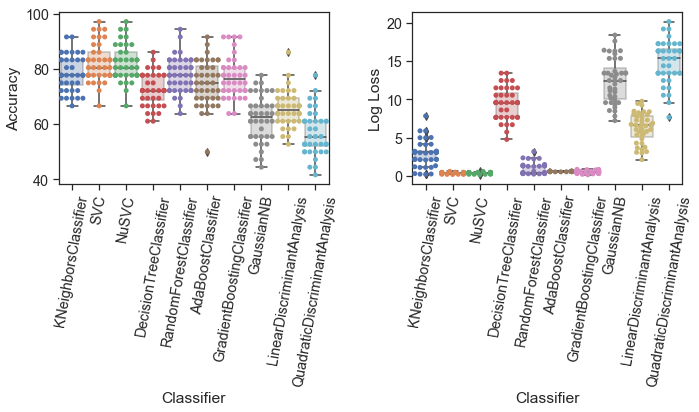

In [99]:
import seaborn as sns

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y=log['Accuracy'],x=log['Classifier'],  boxprops=dict(alpha=.3))
sns.swarmplot(y=log['Accuracy'],x=log['Classifier'])
plt.xticks(rotation=80)


plt.subplot(1,2,2)
sns.boxplot(y=log['Log Loss'],x=log['Classifier'],  boxprops=dict(alpha=.3))
sns.swarmplot(y=log['Log Loss'],x=log['Classifier'])
plt.xticks(rotation=80)

plt.tight_layout()
plt.show()

D'aquests grafics el que veiem clar es que nomes  **SVC, NuSVC, GradientBoosting i AdaBoostClassifier** tenen bons Log Loss (d'aquests, el SVC te accuracy baixos)

# Refem analisi pero nomes tenint en compte els que funcionen be: SVC, NuSVC, GradientBoostingClassifier

C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


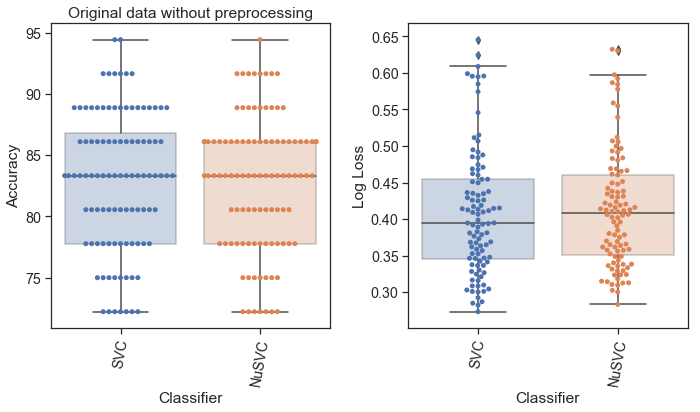

In [36]:
# Aqui fem analisi de les dades sense fer el preprocessing polinomial

classifiers = [
    SVC(probability=True),
    NuSVC(probability=True)]


# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)


for i in range (100):
    xx_train, xx_test, yy_train, yy_test = train_test_split(X_train, y_train, test_size=0.2)
    for clf in classifiers:
        clf.fit(xx_train, yy_train)
        name = clf.__class__.__name__
          
    
        train_predictions = clf.predict(xx_test)
        acc = accuracy_score(yy_test, train_predictions)
           
        train_predictions = clf.predict_proba(xx_test)
        ll = log_loss(yy_test, train_predictions)
            
        log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
        log = log.append(log_entry)
    

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y=log['Accuracy'],x=log['Classifier'],  boxprops=dict(alpha=.3))
sns.swarmplot(y=log['Accuracy'],x=log['Classifier'])
plt.xticks(rotation=80)
plt.title('Original data without preprocessing')


plt.subplot(1,2,2)
sns.boxplot(y=log['Log Loss'],x=log['Classifier'],  boxprops=dict(alpha=.3))
sns.swarmplot(y=log['Log Loss'],x=log['Classifier'])
plt.xticks(rotation=80)

plt.tight_layout()
plt.show()

### ara repetim pero fent servir dades preprocesssades (polynomial)

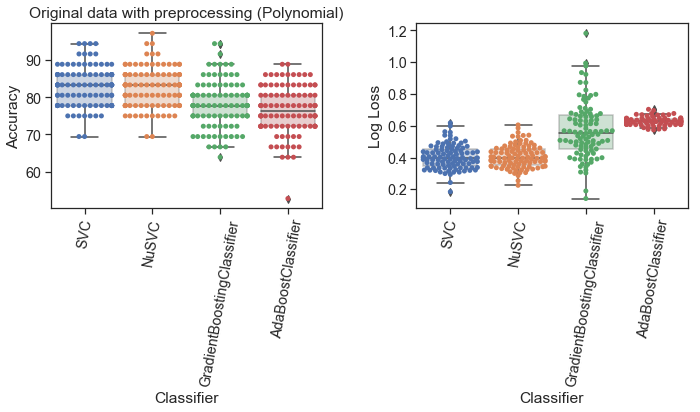

In [110]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


classifiers = [
    SVC(probability=True),
    NuSVC(probability=True)]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)


for i in range (100):
    xx_train, xx_test, yy_train, yy_test = train_test_split(X2_train, y_train, test_size=0.2)
    for clf in classifiers:
        clf.fit(xx_train, yy_train)
        name = clf.__class__.__name__
          
    
        train_predictions = clf.predict(xx_test)
        acc = accuracy_score(yy_test, train_predictions)
           
        train_predictions = clf.predict_proba(xx_test)
        ll = log_loss(yy_test, train_predictions)
            
        log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
        log = log.append(log_entry)
    
   

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y=log['Accuracy'],x=log['Classifier'],  boxprops=dict(alpha=.3))
sns.swarmplot(y=log['Accuracy'],x=log['Classifier'])
plt.xticks(rotation=80)
plt.title('Original data with preprocessing (Polynomial)')


plt.subplot(1,2,2)
sns.boxplot(y=log['Log Loss'],x=log['Classifier'],  boxprops=dict(alpha=.3))
sns.swarmplot(y=log['Log Loss'],x=log['Classifier'])
plt.xticks(rotation=80)

plt.tight_layout()
plt.show()

D'aixo el que veiem es que amb diferencia els millors resultats son per SVC (en SVC o NuSVC, i segurament en LinearSVC-no el podem posar aqui perque necessitem calcular probablitats-). Ademes sembla que fent el tractament i passant el polynomial sense bias milloran els resultats....